<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_2/04_MLP_complete/04_MLP_complete_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
################################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV)  #
# Author 2: Fernando Arce-Vega (CIO)           #
# e-mail 1: wilfrido.gomez@cinvestav.mx        #
# e-mail 2: farce@cio.mx                       #
# Date:     nov/03/2025                        #
# Subject:  Multi-layer perceptron - complete  #
################################################

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import pandas as pd                                                   # Data manipulation/analysis
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import os                                                             # Interaction with the operating system
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Model evaluation
from sklearn.model_selection import train_test_split                  # Split data
import tensorflow as tf                                               # Machine learning

In [ ]:
# Ignore warnings
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [ ]:
# Load dataset
# Path to dataset
path = 'https://raw.githubusercontent.com/fernandoarcevega/AI_Workshop/main/datasets/mias_data.csv'
T = pd.read_csv(path)
data = T.values
n, d = data.shape
X = data[:, :d-1]      # Features
Y = data[:, d-1] - 1   # Class labels

In [ ]:
# Check feature and targets shapes
print(f'Features shape: {X.shape}')
print(f'Targets shape:  {Y.shape}')

Features shape: (322, 63)
Targets shape:  (322,)


In [ ]:
# Split dataset into training and test sets (80%-20%)
Xtr, Xtt, Ytr, Ytt = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Check feature and targets shapes
print(f'Features training shape: {Xtr.shape}')
print(f'Targets training shape:  {Ytr.shape}\n')
print(f'Features testing shape:  {Xtt.shape}')
print(f'Targets testing shape:   {Ytt.shape}')

Features training shape: (257, 63)
Targets training shape:  (257,)

Features testing shape:  (65, 63)
Targets testing shape:   (65,)


In [ ]:
# Data normalization
def zscorenorm(X, stats=None):

  if stats is None:
    mean = np.mean(X, axis=0, keepdims=True)
    std = np.std(X, axis=0, keepdims=True)
    return (X - mean) / std, (mean, std)

  else:
    mean, std = stats
    return (X - mean) / std

In [ ]:
# Norm data
Xtr, stats = zscorenorm(Xtr)
Xtt = zscorenorm(Xtt, stats)

In [ ]:
def mlp(X, y, h, eta, lam, nb, patience, epochMax):
    # Model
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(63,)),
    tf.keras.layers.Dense(
        units=h,
        activation='relu',
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam)),   # L2 regularization

    tf.keras.layers.Dense(
        units=3,
        activation='softmax',
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        kernel_regularizer=tf.keras.regularizers.l2(lam))])   # L2 regularization

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=eta)

    # Callbacks
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=patience,
        restore_best_weights=True
        )


    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    # Training model
    history = model.fit(X, y,
                    batch_size = nb,
                    epochs = epochMax,
                    verbose = 2,
                    callbacks=[early_stop],
                    validation_split=0.2)

    return model, history

In [ ]:
# Hyper-parameters
h = 100             # Hidden neurons
epochMax = 100      # Number of training epochs
eta = 1e-5          # Learning rate
lam = 1e-8          # Regularization factor
nb = 64             # Batch size
patience = 20      # Patience

# Train MLP
model, history = mlp(Xtr, Ytr, h, eta, lam, nb, patience, epochMax)

Epoch 1/100
4/4 - 1s - 270ms/step - accuracy: 0.2488 - loss: 1.2932 - val_accuracy: 0.2885 - val_loss: 1.2343
Epoch 2/100
4/4 - 0s - 23ms/step - accuracy: 0.2537 - loss: 1.2885 - val_accuracy: 0.2885 - val_loss: 1.2304
Epoch 3/100
4/4 - 0s - 20ms/step - accuracy: 0.2537 - loss: 1.2841 - val_accuracy: 0.2885 - val_loss: 1.2265
Epoch 4/100
4/4 - 0s - 24ms/step - accuracy: 0.2537 - loss: 1.2796 - val_accuracy: 0.2885 - val_loss: 1.2226
Epoch 5/100
4/4 - 0s - 24ms/step - accuracy: 0.2537 - loss: 1.2752 - val_accuracy: 0.2885 - val_loss: 1.2188
Epoch 6/100
4/4 - 0s - 17ms/step - accuracy: 0.2585 - loss: 1.2710 - val_accuracy: 0.2885 - val_loss: 1.2151
Epoch 7/100
4/4 - 0s - 18ms/step - accuracy: 0.2683 - loss: 1.2667 - val_accuracy: 0.2885 - val_loss: 1.2114
Epoch 8/100
4/4 - 0s - 20ms/step - accuracy: 0.2683 - loss: 1.2625 - val_accuracy: 0.3077 - val_loss: 1.2077
Epoch 9/100
4/4 - 0s - 17ms/step - accuracy: 0.2732 - loss: 1.2585 - val_accuracy: 0.3077 - val_loss: 1.2041
Epoch 10/100
4/4 -

In [ ]:
# Predict test data
Ypp = model.predict(Xtt)
Ypp = np.argmax(Ypp, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


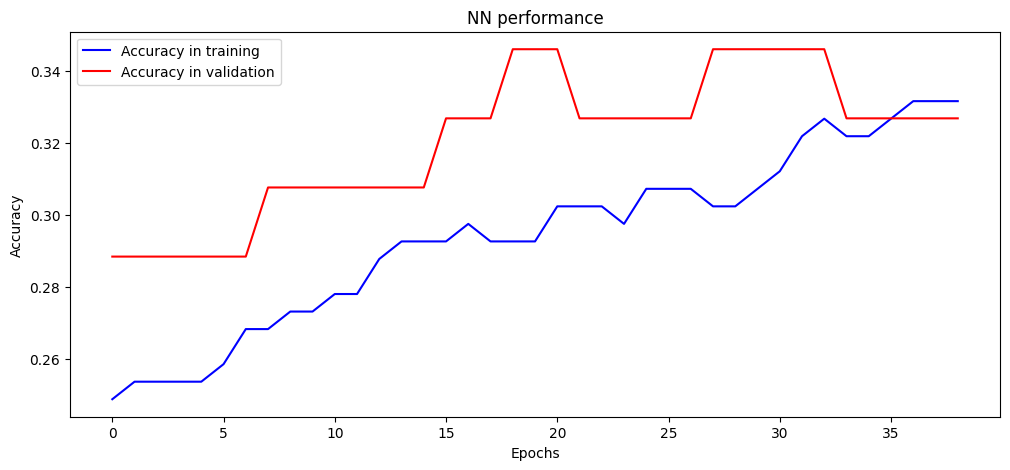

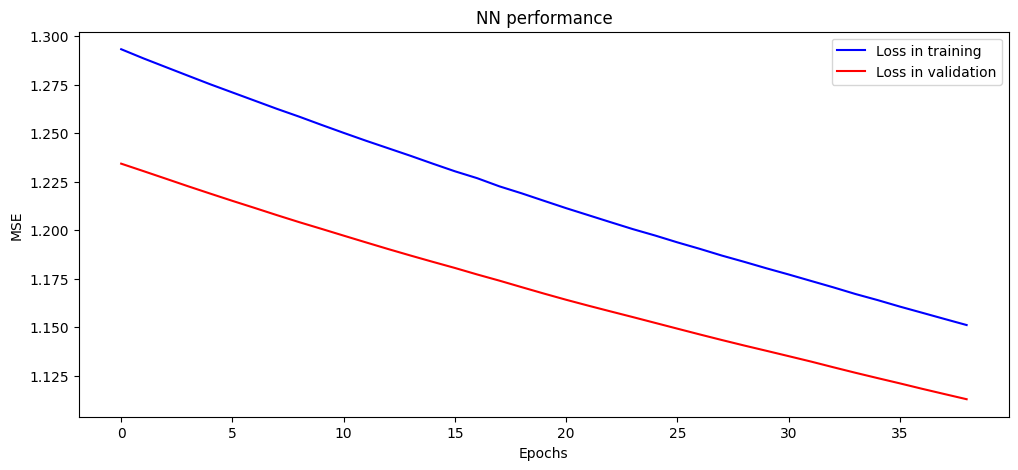

In [ ]:
# Learning curve
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocs = np.arange(len(training_loss))

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_acc, color = 'blue', label = 'Accuracy in training')
plt.plot(epocs, validation_acc, color = 'red', label = 'Accuracy in validation')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()

plt.figure(figsize = (12, 5))
plt.plot(epocs, training_loss, color = 'blue', label = 'Loss in training')
plt.plot(epocs, validation_loss, color = 'red', label = 'Loss in validation')
plt.title('NN performance')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

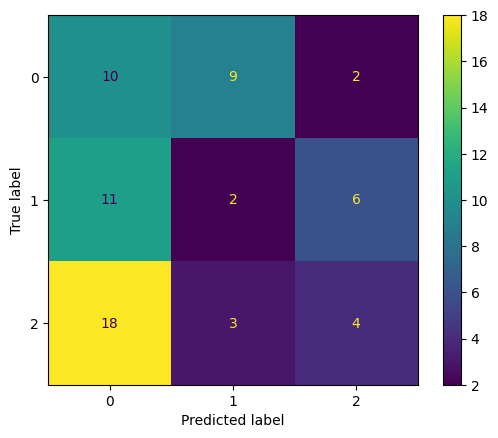

Error: 75.385%


In [ ]:
# Confusion matrix
cm = confusion_matrix(Ytt, Ypp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Print classification error
err = np.mean(Ypp != Ytt)
print(f'Error: {100 * err:.3f}%')